Clone the github repository containing dataset

In [1]:
!git clone https://{github token access}@github.com/spMohanty/PlantVillage-Dataset.git

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 32.01 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Updating files: 100% (182401/182401), done.


Import important packages

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

Delete another plant disease classes (Don't run this if you already deleted it)

In [6]:
dataset_dir = '/content/PlantVillage-Dataset/raw/color'

In [7]:
directory = dataset_dir  # Replace with the path to your directory

# Get a list of folders in the directory
folders = sorted([folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))])

# Select the folders to delete based on the index range
folders_to_delete = folders[:28]  # Index range from 0 until 27 (exclusive)

# Delete the selected folders
for folder in folders_to_delete:
    folder_path = os.path.join(directory, folder)
    shutil.rmtree(folder_path)  # Remove the folder and its contents recursively

print("Folders deleted successfully.")

Folders deleted successfully.


Menghitung jumlah gambar pada dataset

In [8]:
classes = sorted(os.listdir(dataset_dir))
print(classes)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [9]:
label_num = {}
total_files = 0
for i in classes:
  counting = len(os.listdir(os.path.join(dataset_dir, i)))
  label_num[i] = counting
  total_files += counting

print("Total files : " + str(total_files))

Total files : 18160


Visualisasi jumlah gambar tiap kelas

Text(29.597222222222214, 0.5, 'jumlah Gambar')

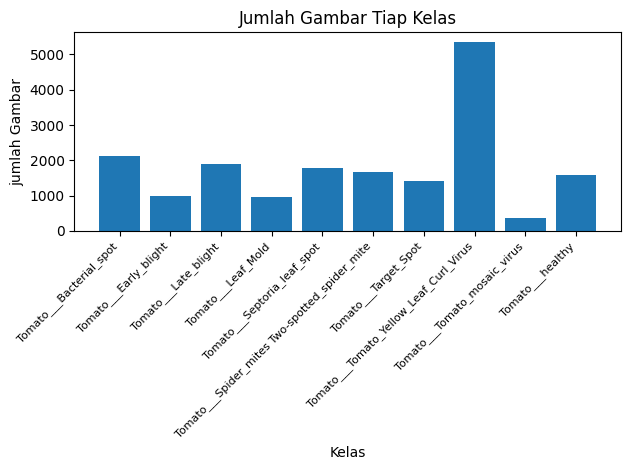

In [10]:
plt.bar(label_num.keys(), label_num.values())
plt.title("Jumlah Gambar Tiap Kelas")
plt.xlabel('Kelas')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate labels, align them to the right, and reduce font size
plt.tight_layout()  # Adjust spacing between plot elements
plt.ylabel('jumlah Gambar')

Menampilkan sampel gambar tiap kelas

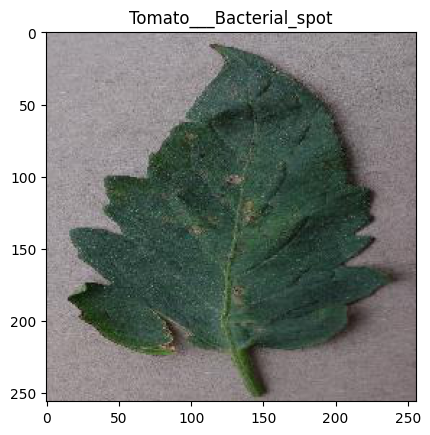

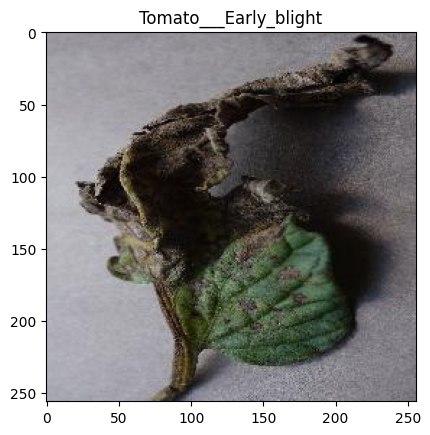

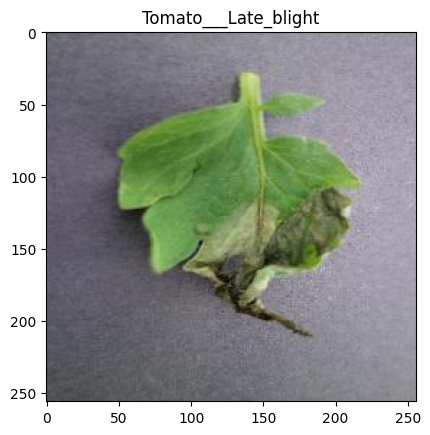

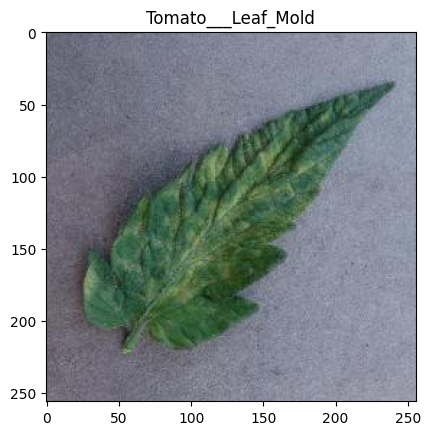

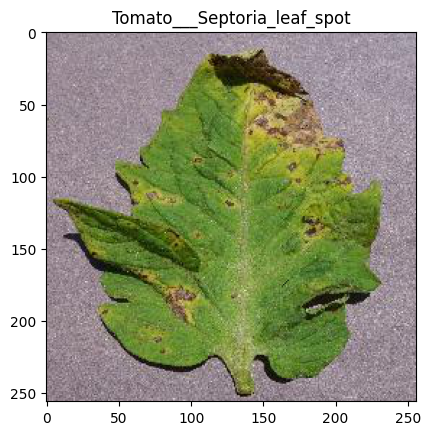

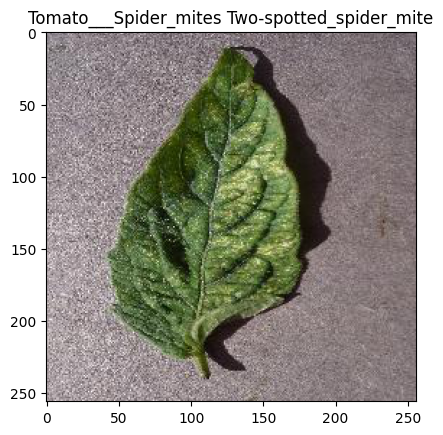

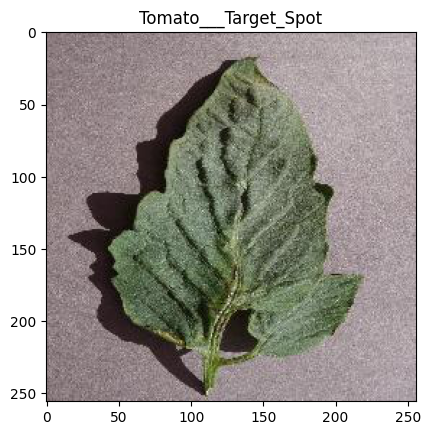

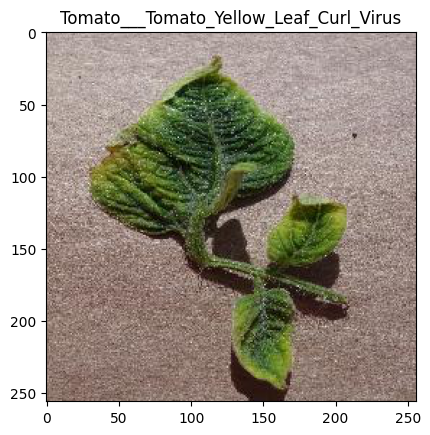

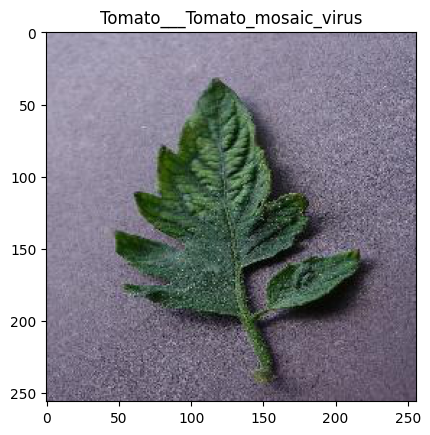

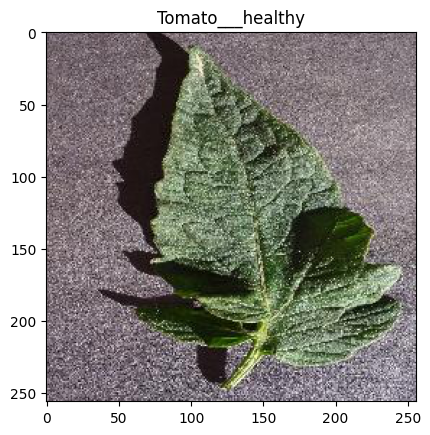

In [11]:
img_each_class = 1
img_samples = {}
classes = list(label_num.keys())

for c in classes:
  temp = os.listdir(os.path.join(dataset_dir, c))[:1]
  for item in temp:
    img_path = os.path.join(dataset_dir, c, item)
    img_samples[c]= img_path

for i in img_samples:
  fig = plt.gcf()
  img = mpimg.imread(img_samples[i])
  plt.title(i)
  plt.imshow(img)
  plt.show()

Split the Data into training and validation

In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the path to your data directory
data_dir = '/content/PlantVillage-Dataset/raw/color'

# List all subdirectories in the data directory
subdirectories = os.listdir(data_dir)

# Create directories for training, validation, and test data
train_dir = '/content/Tomatify/training'
valid_dir = '/content/Tomatify/validation'
test_dir = '/content/Tomatify/test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split each class into training, validation, and test sets
for subdir in subdirectories:
    # Get the path to the current class directory
    class_dir = os.path.join(data_dir, subdir)
    
    # List all image files in the current class directory
    files = os.listdir(class_dir)
    
    # Split the files into training, validation, and test sets
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)
    valid_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)
    
    # Move the files to their respective directories
    for file in train_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(train_dir, subdir, file)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copyfile(src, dst)
    
    for file in valid_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(valid_dir, subdir, file)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copyfile(src, dst)
    
    for file in test_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(test_dir, subdir, file)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copyfile(src, dst)

In [13]:
IMAGE_SIZE = (224, 224, 3)
BATCH_SIZE = 32
SEED = 999

Image processing

In [69]:
train_dir = '/content/Tomatify/training'
valid_dir = '/content/Tomatify/validation'
test_dir = '/content/Tomatify/test'

# Set the target image size and batch size
target_size = (224, 224)
batch_size = 32

# Create data generators for training, validation, and test sets
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=10,  # Rotate images randomly within the range of 10 degrees
    zoom_range=0.2,  # Apply random zoom between 0.2 and 0.3
    horizontal_flip=True  # Flip images horizontally randomly
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)


valid_data = datagen.flow_from_directory(
    valid_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)


test_data = datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = False
)

Found 14523 images belonging to 10 classes.
Found 1816 images belonging to 10 classes.
Found 1821 images belonging to 10 classes.


In [15]:
from tensorflow.keras.applications.vgg16 import VGG16
#Loading vgg16 model
base_vgg_model = VGG16(include_top = False, weights = "imagenet", input_shape = IMAGE_SIZE)
base_vgg_model.trainable = False
base_vgg_model.summary()

# Preprocessing Input
vgg_preprocess = tf.keras.applications.vgg16.preprocess_input
train_data.preprocessing_function = vgg_preprocess
valid_data.preprocessing_function = vgg_preprocess

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [16]:
#Transfer Learning with VGG16
vgg_model = tf.keras.models.Sequential([
    base_vgg_model,
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation = 'softmax'),
    ])
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 17,927,370
Trainable params: 3,212,682
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
vgg_model.compile(
    loss='categorical_crossentropy', 
    optimizer = tf.optimizers.Adam(),
    metrics=['accuracy'])

In [18]:
BATCH_SIZE =32
EPOCH = 20

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights = False, verbose = 0)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)

In [19]:
history = vgg_model.fit(
    train_data,
    epochs=EPOCH,
    validation_data = valid_data,
)

Epoch 1/20
454/454 [==============================] - 259s 538ms/step - loss: 0.9169 - accuracy: 0.6993 - val_loss: 0.5292 - val_accuracy: 0.8111
Epoch 2/20
454/454 [==============================] - 219s 482ms/step - loss: 0.6065 - accuracy: 0.7969 - val_loss: 0.4661 - val_accuracy: 0.8464
Epoch 3/20
454/454 [==============================] - 217s 477ms/step - loss: 0.5313 - accuracy: 0.8181 - val_loss: 0.4154 - val_accuracy: 0.8579
Epoch 4/20
454/454 [==============================] - 224s 494ms/step - loss: 0.4900 - accuracy: 0.8304 - val_loss: 0.3997 - val_accuracy: 0.8651
Epoch 5/20
454/454 [==============================] - 215s 474ms/step - loss: 0.4446 - accuracy: 0.8440 - val_loss: 0.3430 - val_accuracy: 0.8910
Epoch 6/20
454/454 [==============================] - 234s 515ms/step - loss: 0.4380 - accuracy: 0.8465 - val_loss: 0.3379 - val_accuracy: 0.8833
Epoch 7/20
454/454 [==============================] - 215s 474ms/step - loss: 0.4100 - accuracy: 0.8560 - val_loss: 0.3112 -

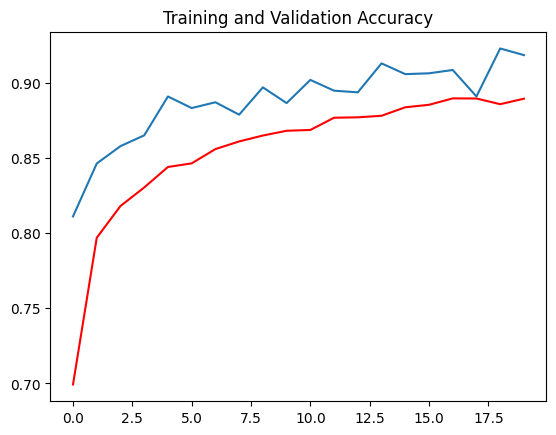

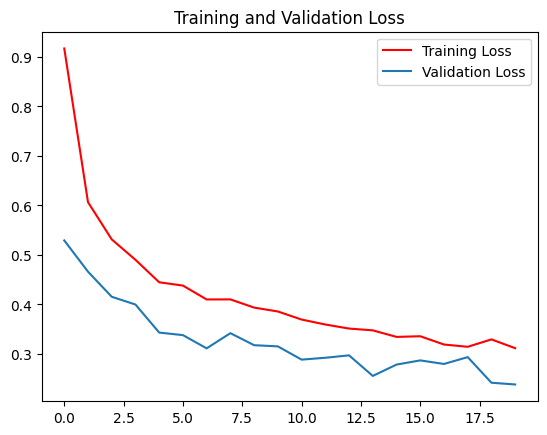

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

Test our Data

In [70]:
test_data.preprocessing_function = vgg_preprocess

In [71]:
test_loss, test_accuracy = vgg_model.evaluate(test_data)

57/57 [==============================] - 26s 460ms/step - loss: 0.2729 - accuracy: 0.9061


In [62]:
true_labels = test_data.classes

In [83]:
# Generate the predicted labels
predicted_labels = vgg_model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert probabilities to class labels

# Align the predicted labels with the true labels
num_samples = len(predicted_labels)
aligned_predicted_labels = predicted_labels[:num_samples]



57/57 [==============================] - 24s 420ms/step


In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [89]:
class_names = ['bacterial_spot', 'early_blight', 'healthy', 'late_blight', 'leaf_mold', 'mosaic_virus', 'septoria_leaf_spot', 'spider_mites', 'target_spot', 'yellow_leaf_curl']

In [90]:
# Compute accuracy or generate classification report
accuracy = accuracy_score(true_labels, aligned_predicted_labels)
classification_report = classification_report(true_labels, aligned_predicted_labels, target_names=class_names)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)

Accuracy: 0.9055464030752334
Classification Report:
                    precision    recall  f1-score   support

    bacterial_spot       0.92      0.95      0.93       213
      early_blight       0.79      0.68      0.73       100
           healthy       0.90      0.84      0.87       191
       late_blight       0.87      0.85      0.86        96
         leaf_mold       0.90      0.82      0.86       178
      mosaic_virus       0.88      0.88      0.88       168
septoria_leaf_spot       0.74      0.88      0.80       141
      spider_mites       0.97      0.99      0.98       536
       target_spot       0.82      0.97      0.89        38
  yellow_leaf_curl       0.99      0.95      0.97       160

          accuracy                           0.91      1821
         macro avg       0.88      0.88      0.88      1821
      weighted avg       0.91      0.91      0.91      1821



1/1 [==============================] - 0s 21ms/step


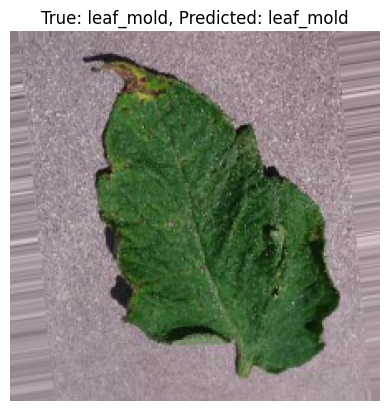

In [117]:
# Get a batch of images and labels from test_data
batch_images, batch_labels = test_data.next()

# Select a single image and its corresponding label
index = 24  # Index of the image you want to predict and plot
image = batch_images[index]
true_label = batch_labels[index]

# Make the prediction using the model
prediction = vgg_model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

# Plot the image
plt.imshow(image)
plt.axis('off')

# Show the true and predicted labels
true_class = class_names[np.argmax(true_label)]
predicted_class = class_names[predicted_label]
plt.title(f'True: {true_class}, Predicted: {predicted_class}')

plt.show()

**Save the model into h5 format**

In [59]:
import os
save_dir="/content/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
vgg_model.save(save_dir + 'model.h5')